# WEEK 15 (05/02/18)

### Done
* Write code to optimise flow wrt to $\gamma$ $\checkmark$

### To Do
* Look into possible differences of minimised gamma in different areas (other cities, random vs real etc.) to see if we always get the same exponent
* Plot $\gamma$ against d_max
* 

## 1. Minimising $\epsilon$ to find a scaling relation for $\gamma$

Given last week's results, we know that by fine-tuning $\gamma$ at each level can yield an optimised $\epsilon$ matrix, meaning that, applying the *correct* scaling to this parameter results in a model which minimises the error due to coarse graining.

This is a very important result! It means that the *highly non-linear fitting of deterrence functions, here represented by the power gamma, is in fact important in understanding how the spatial models react to different coarse graining scales* (Tim)

Also, calibration of the gravity model is usually carried out by fitting a deterrenced function to satisfy the observed data, while this could be a more robust way of doing it without using data.

So, given an initial (data-fitted ?) $\gamma$ for our finest level (before applying the clustering algorithm), we can find the parameter that minimises the RMS of our epsilon matrix.

Once this is done, we can then investigate how (if at all) our parameter $\gamma$ is related to average surface area of the locations over which we are coarse-graning and computing our flow.

This should give us an idea on a possible equation that relates the two quantities and yields a scaling relation for the parameter $\gamma$ that can then be applied to real flows, without requiring a fitting of the data (although we need to verify this).

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import pandas
import seaborn as sns; sns.set()

from hm.pop_models import pop_random, population
from hm.analysis.scaling.pop_hierarchy import pop_hier
import hm.analysis.scaling.eps_scale
from hm.analysis.scaling.plots import *
from matplotlib import pyplot as plt
from hm.analysis.scaling import gamma_opt

### 1.1 Random Population

For simplicity, let's start from a random distribution of 1000 locations with uniform population.
We'll apply our clustering algorithm as done many times before, but this time, the epsilon matrix computed at each level will include the ODM obtained by using the parameter gamma as obtained through the optimisation process.

In [5]:
pop = pop_random.random(1000)
d_maxs = [0.005, 0.006, 0.007, 0.008]
h = pop_hier(pop, d_maxs)
gamma_0 = 2.

Let's calculate the $\gamma$ that optimises the error at each level and the $\epsilon$ itself so the latter is ready to be plotted.

In [12]:
gammas = [gamma_0]
epsilons = []
for i in range(1, len(d_maxs)+1):
    gammas.append(gamma_opt.optimise_eps(h, i, gamma_0).x)
    epsilons.append(h.epsilon_to_opt(i, gamma_0, gammas[i]))

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

Now let's plot the epsilon as a function of distance for the 4 levels using the gamma found above.

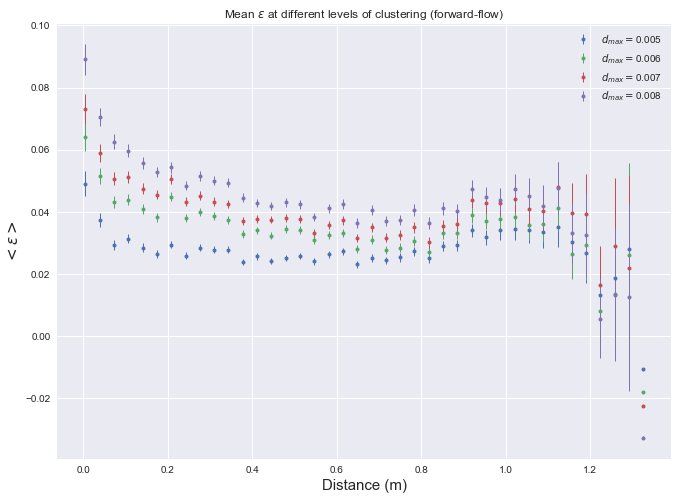

In [35]:
DMList = [h.DM_level(1), h.DM_level(2), h.DM_level(3), h.DM_level(4)]
eps_distance_hier(epsilons, DMList, d_maxs, 40)
plt.show()

Now let's see how this differs from just keeping the $\gamma$ fixed at the same value.

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

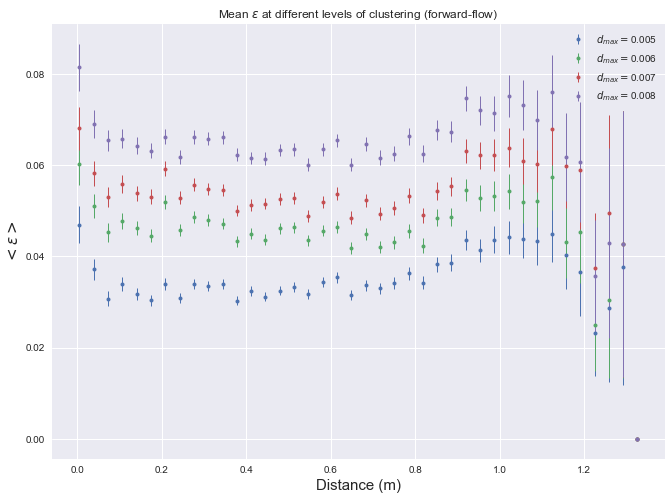

In [38]:
epsList, DMList = eps_hier(h, model='g', gamma=gamma)
eps_distance_hier(epsList, DMList, d_maxs, 40)
plt.show()

### 1.2 London

Now let's do this for a small region of London with a similar number of locations as above.

In [3]:
master_df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/LSOA populations and areas 2011 (merged).csv")
df = master_df[master_df['Easting'] < 561966][master_df['Easting'] > 493024][master_df['Northing'] < 207218][master_df['Northing'] > 150912]
small_df = df[df['Easting'] < 527530][df['Easting'] > 493171][df['Northing'] < 179073.5][df['Northing'] > 150941]

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
d_maxs_lon = [200, 300, 400, 500]
h_lon = pop_hier(small_df, d_maxs_lon)
gamma_0 = 2.

In [62]:
gammas_lon = [gamma_0]
epsilons_lon = []
for i in range(1, len(d_maxs_lon)+1):
    gammas_lon.append(gamma_opt.optimise_eps(h_lon, i, gamma_0).x)
    epsilons_lon.append(h_lon.epsilon_to_opt(i, gamma_0, gammas_lon[i]))

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

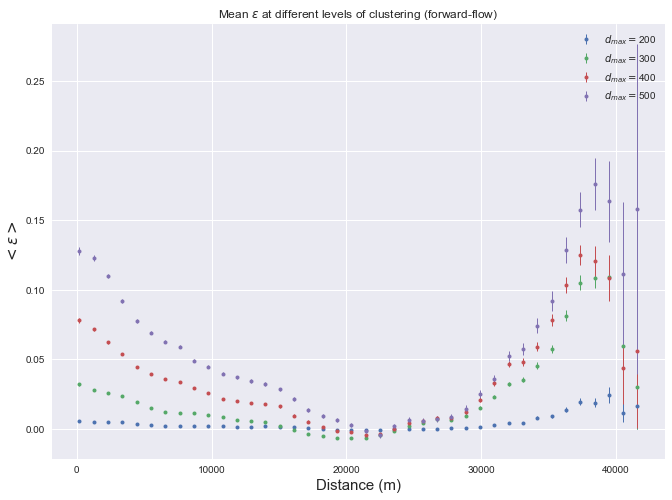

In [65]:
DMList = [h_lon.DM_level(1), h_lon.DM_level(2), h_lon.DM_level(3), h_lon.DM_level(4)]
eps_distance_hier(epsilons_lon, DMList, d_maxs_lon, 40)
plt.show()

If, instead, we keep $\gamma$ constant (= 2) at every level, this is what we get:

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

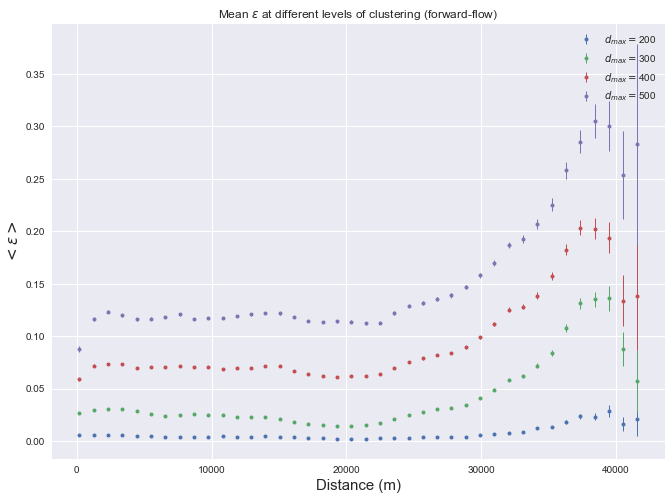

In [7]:
DMList_lon = [h_lon.DM_level(1), h_lon.DM_level(2), h_lon.DM_level(3), h_lon.DM_level(4)]
epsList, DMList = eps_hier(h_lon, model='g', gamma=gamma_0)
eps_distance_hier(epsList, DMList_lon, d_maxs_lon, 40)
plt.show()

### 1.3 Manchester

In [12]:
df = master_df
man_df = df[(df['Easting'] < 395108) & (df['Easting'] > 373295)][(df['Northing'] < 407242) & (df['Northing'] > 389212)]
d_maxs_man = [200, 300, 400, 500]
h_man = pop_hier(man_df, d_maxs_man)
gamma_0 = 2.

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [13]:
gammas_man = [gamma_0]
epsilons_man = []
for i in range(1, len(d_maxs_man)+1):
    gammas_man.append(gamma_opt.optimise_eps(h_man, i, gamma_0).x)
    epsilons_man.append(h_man.epsilon_to_opt(i, gamma_0, gammas_man[i]))

A Jupyter Widget

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/Ilaria/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/Ilaria/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/Ilaria/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

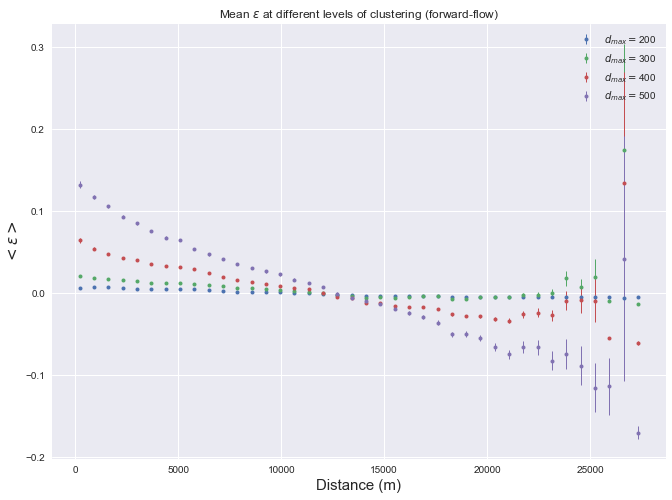

In [15]:
DMList = [h_man.DM_level(1), h_man.DM_level(2), h_man.DM_level(3), h_man.DM_level(4)]
eps_distance_hier(epsilons_man, DMList, d_maxs_man, 40)
plt.show()

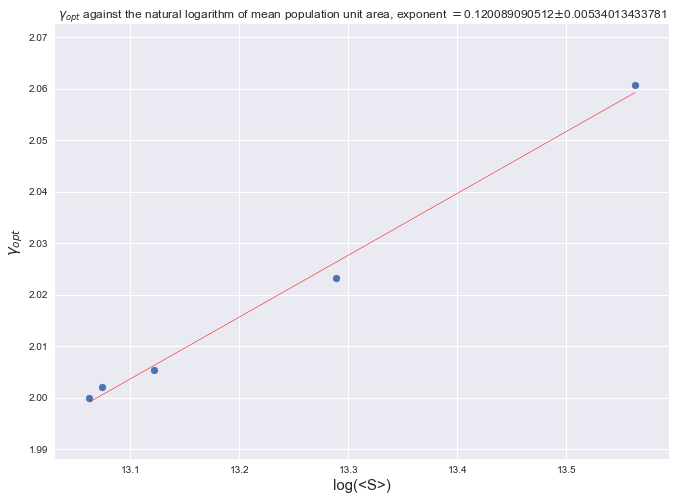

In [33]:
gamma_S(h_man, gamma_0, gammas_man[1:])

### 1.4 Liverpool

In [14]:
liv_df = df[(df['Easting'] < 395108) & (df['Easting'] > 373295)][(df['Northing'] < 407242) & (df['Northing'] > 389212)]
d_maxs_liv = [200, 300, 400, 500]
h_liv = pop_hier(liv_df, d_maxs_liv)

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [20]:
gammas_liv = [gamma_0]
epsilons_liv = []
for i in range(1, len(d_maxs_liv)+1):
    gammas_liv.append(gamma_opt.optimise_eps(h_liv, i, gamma_0).x)
    epsilons_liv.append(h_liv.epsilon_to_opt(i, gamma_0, gammas_liv[i]))

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

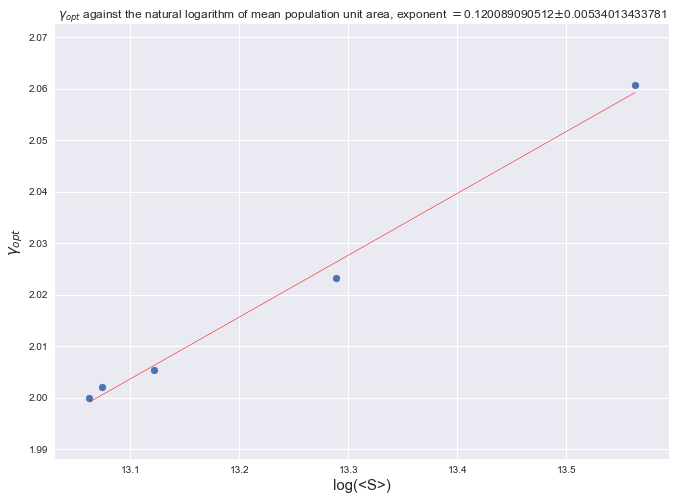

In [26]:
gamma_S(h_liv, gamma_0, gammas_liv[1:])

### 1.5 Birmingham

In [21]:
bir_df = df[(df['Easting'] < 447384) & (df['Easting'] > 375647)][(df['Northing'] < 314728) & (df['Northing'] > 261315)]
d_maxs_bir = [200, 300, 400, 500]
h_bir = pop_hier(bir_df, d_maxs_bir)

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [22]:
gammas_bir = [gamma_0]
epsilons_bir = []
for i in range(1, len(d_maxs_bir)+1):
    gammas_bir.append(gamma_opt.optimise_eps(h_bir, i, gamma_0).x)
    epsilons_bir.append(h_bir.epsilon_to_opt(i, gamma_0, gammas_bir[i]))

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

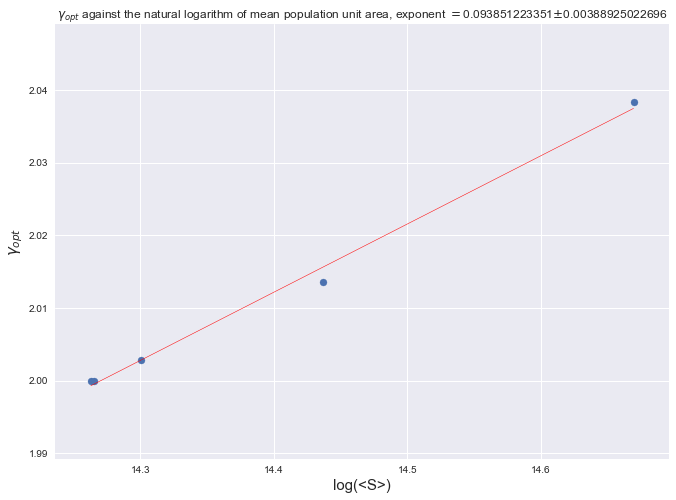

In [25]:
gamma_S(h_bir, gamma_0, gammas_bir[1:])

## 2. Exponential Gravity

Let's do the same analysis for the exponential form of the gravity model.

In [7]:
gamma_0
gammas = [gamma_0]
epsilons = []
for i in range(1, len(d_maxs)+1):
    gammas.append(gamma_opt.optimise_eps(h, i, gamma_0).x)
    epsilons.append(h.epsilon_to_opt(i, gamma_0, gammas[i], exp=True))

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

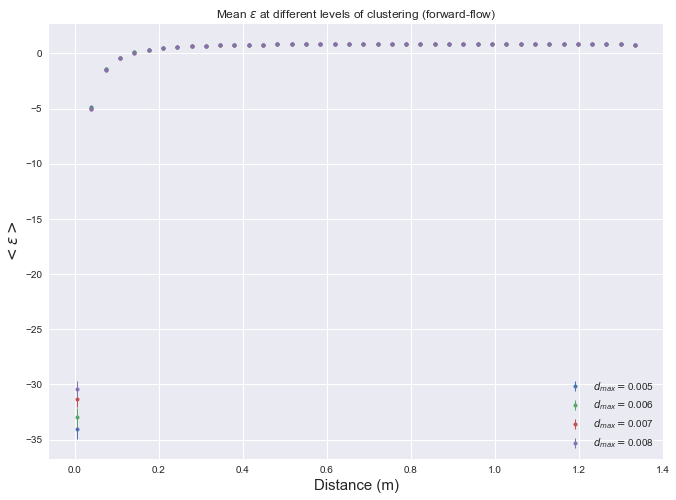

In [8]:
DMList = [h.DM_level(1), h.DM_level(2), h.DM_level(3), h.DM_level(4)]
eps_distance_hier(epsilons, DMList, d_maxs, 40)
plt.show()

In [9]:
gammas

[2.0,
 2.0019999844471892,
 2.0047345589816059,
 2.0096563492722699,
 2.0118514240951861]

Essentially it makes very little difference in the exponential case. It also goes negative... So we need to understand what exactly it's happening here.